In [3]:
import numpy as np

# Constants
AIR_DENSITY = 1.225  # kg/m^3
WATER_DENSITY = 1025  # kg/m^3
GRAVITY = 9.81  # m/s^2

# Example usage with real data
ship_speed = 20 * 1000 / 3600  # converting km/h to m/s
wind_speed = 20  # m/s
wind_direction = 180  # degrees
ship_heading = 0  # degrees
frontal_area = 32.2 * 10.8  # m^2
drag_coefficient = 0.4
wave_height = 4  # meters
wave_period = 10  # seconds
wave_direction = 0  # degrees
swell_height = 3  # meters
swell_period = 12  # seconds
swell_direction = 0  # degrees
bathymetry = 50  # meters depth
deviation_from_route = 2  # kilometers
ship_length = 230  # meters
displacement = 52030  # cubic meters

def calculate_relative_wind_speed(ship_speed, wind_speed, wind_direction, ship_heading):
    relative_angle = np.radians(np.abs(wind_direction - ship_heading))
#     print(relative_angle)
    V_rel = np.sqrt(ship_speed**2 + wind_speed**2 + 2 * ship_speed * wind_speed * np.cos(relative_angle))
    return V_rel

def calculate_air_resistance(V_rel, frontal_area, drag_coefficient):
    air_resistance = 0.5 * AIR_DENSITY * drag_coefficient * frontal_area * (V_rel ** 2)
    return air_resistance

def calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading, ship_length, displacement):
    relative_angle = np.radians(np.abs(wave_direction - ship_heading))
    wave_resistance_coefficient = 0.1  # Adjust based on empirical data
    wave_resistance = wave_resistance_coefficient * wave_height * (ship_length / wave_period) * displacement * np.cos(relative_angle)
    return wave_resistance

def calculate_swell_resistance(swell_height, swell_period, swell_direction, ship_heading, ship_length, displacement):
    relative_angle = np.radians(np.abs(swell_direction - ship_heading))
    swell_resistance_coefficient = 0.1  # Similar to wave resistance
    swell_resistance = swell_resistance_coefficient * swell_height * (ship_length / swell_period) * displacement * np.cos(relative_angle)
    return swell_resistance

def calculate_involuntary_speed_reduction(wind_resistance, wave_resistance, swell_resistance):
    alpha=0.6
    beta=0.3
    gamma=0.1
    # Scale resistances down
    wind_resistance_scaled = wind_resistance / 1000
    wave_resistance_scaled = wave_resistance / 1000
    swell_resistance_scaled = swell_resistance / 1000

    # Calculate reductions
    V_wind_reduction = wind_resistance_scaled / ship_speed
    V_wave_reduction = wave_resistance_scaled / ship_speed
    V_swell_reduction = swell_resistance_scaled / ship_speed
    print(V_wind_reduction,V_wave_reduction,V_swell_reduction)
    delta_V = alpha * V_wind_reduction + beta * V_wave_reduction + gamma * V_swell_reduction
    return delta_V


def calculate_safety_cost(wind_resistance, wave_resistance, swell_resistance):
    alpha=0.6
    beta=0.3
    gamma=0.1
    delta = 0.1
    # Safety cost components
    C_wind = wind_resistance / 1000
    C_wave = wave_resistance / 1000
    C_swell = swell_resistance / 1000
    C_bathymetry = max(0, 1 - bathymetry / 10)
    C_deviation = deviation_from_route ** 2

    # Total safety cost
    total_cost = alpha * C_wind + beta * C_wave + gamma * C_swell + delta * C_bathymetry + (1 - (alpha + beta + gamma + delta)) * C_deviation
    return total_cost

# Calculate involuntary speed reduction
V_rel = calculate_relative_wind_speed(ship_speed, wind_speed, wind_direction, ship_heading)
print(V_rel)
wind_resistance = calculate_air_resistance(V_rel, frontal_area, drag_coefficient)
# print(wind_resistance)
wave_resistance = calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading, ship_length, displacement)
swell_resistance = calculate_swell_resistance(swell_height, swell_period, swell_direction, ship_heading, ship_length, displacement)

print(wind_resistance,wave_resistance,swell_resistance)
# involuntary_speed_reduction = calculate_involuntary_speed_reduction(wind_resistance, wave_resistance, swell_resistance)

# # Calculate safety cost
# safety_cost = calculate_safety_cost(wind_resistance, wave_resistance, swell_resistance)
# print(f"Involuntary Speed Reduction: {involuntary_speed_reduction:.2f} m/s")
# print(f"Safety Cost: {safety_cost:.2f}")
# 55643.74666666667 478676.00000000006 299172.50000000006 --> 0 0 20
# 17776.54666666667 -478676.00000000006 -299172.50000000006 --> 0 180 20
# 101084.38666666667 -478676.00000000006 -299172.50000000006 --> 0 180 40

14.444444444444445
17776.54666666667 478676.00000000006 299172.50000000006


In [76]:
#### import math

# Constants
rho_air = 1.225  # kg/m^3 (air density)
rho_water = 1025  # kg/m^3 (water density)
g = 9.81  # m/s^2 (gravitational constant)
drag_coefficient = 0.9  # drag coefficient
ship_speed = 10
frontal_area = 32.2 * 10.8  # m^2 (frontal area)
beta_1 = 1  # weight for fuel cost
beta_2 = 1  # weight for time cost
alpha = 0.0001  # scaling factor for speed reduction due to resistance
k_wave = 0.8  # Constant for wave resistance approximation
k_swell = 0.7  # Constant for swell resistance approximation
ship_length = 230  # meters
ship_width = 32.2  # meters
displacement = 52030  # cubic meters
draft = displacement / (ship_length * ship_width)  # approximated draft (m)
A_ship = ship_length * draft  # Approximated immersed area

# Scenario 1 parameters
wind_speed_1 = 10  # m/s
wave_height_1 = 4  # meters
wave_period_1 = 10  # seconds
swell_height_1 = 4  # meters
swell_period_1 = 12  # seconds
deviation_from_route_1 = 2 * 1000  # 2 km in meters
D_1 = 100 * 1000  # distance to destination (100 km)

# Scenario 2 parameters
wind_speed_2 = 20  # m/s
wave_height_2 = 4  # meters
wave_period_2 = 10  # seconds
swell_height_2 = 4  # meters
swell_period_2 = 12  # seconds
deviation_from_route_2 = 2 * 1000  # 2 km in meters
D_2 = 100 * 1000  # distance to destination (100 km)

# Helper function to calculate wind resistance

def calculate_wind_resistance(wind_speed, ship_heading, wind_direction):
    """
    Calculates the wind resistance acting on a ship based on wind speed, ship speed, and relative directions.
    
    Parameters:
    wind_speed (float): Speed of the wind in m/s.
    ship_speed (float): Speed of the ship in m/s.
    ship_heading (float): Heading of the ship in degrees (0-360).
    wind_direction (float): Direction of the wind in degrees (0-360).
    drag_coefficient (float): Drag coefficient of the ship.
    frontal_area (float): Frontal area of the ship in square meters.
    rho_air (float): Air density in kg/m^3 (default is 1.225 kg/m^3).

    Returns:
    float: Wind resistance force in Newtons (N).
    """
    # Calculate the relative angle between the wind direction and ship heading
    theta_wind = np.radians(abs(wind_direction - ship_heading)) 
    
    v_rel_wind = np.sqrt(wind_speed**2 + ship_speed**2 + 2*wind_speed*ship_speed*np.cos(theta_wind))
#     print(v_rel_wind)
    # Calculate wind resistance using the drag equation: F = 0.5 * rho * Cd * A * v^2
    F_wind = 0.5 * rho_air * drag_coefficient * frontal_area * v_rel_wind**2
    F_dir = 
    return (F_wind,F_dir)

# Helper function to calculate wave and swell resistance
def calculate_wave_swell_resistance(wave_height, wave_period, swell_height, swell_period):
    F_wave = k_wave * rho_water * g * (wave_height ** 2) / (wave_period ** 2) * A_ship
    F_swell = k_swell * rho_water * g * (swell_height ** 2) / (swell_period ** 2) * A_ship
    return F_wave, F_swell

# # Calculate total resistance and cost for scenario 1
# F_wind_1 = calculate_wind_resistance(wind_speed_1, 0, 0)
# print(F_wind_1)
# F_wave_1, F_swell_1 = calculate_wave_swell_resistance(wave_height_1, wave_period_1, swell_height_1, swell_period_1)
# R_total_1 = F_wind_1 + F_wave_1 + F_swell_1
# C_1 = beta_1 * R_total_1 + beta_2 * (D_1 + deviation_from_route_1) / (ship_speed * (1 - alpha * R_total_1))

# # Calculate total resistance and cost for scenario 2
# F_wind_2 = calculate_wind_resistance(wind_speed_2, 0, 0)
# print(F_wind_2)
# F_wave_2, F_swell_2 = calculate_wave_swell_resistance(wave_height_2, wave_period_2, swell_height_2, swell_period_2)
# R_total_2 = F_wind_2 + F_wave_2 + F_swell_2
# C_2 = beta_1 * R_total_2 + beta_2 * (D_2 + deviation_from_route_2) / (ship_speed * (1 - alpha * R_total_2))

print('check:')
for i in range(0,80,10):
    print(i,calculate_wind_resistance(i,0,0))

# Output results
# print("Scenario 1 - Total Resistance:", R_total_1, "N, Cost:", C_1)
# print("Scenario 2 - Total Resistance:", R_total_2, "N, Cost:", C_2)

# Scenario 1 - Total Resistance: 3368494.4240372665 N, Cost: 3368439.756684334
# Scenario 2 - Total Resistance: 2529693.1229125774 N, Cost: 2529620.971269051

check:
0 (19170.27, 10.0)
10 (76681.08, 20.0)
20 (172532.43000000002, 30.0)
30 (306724.32, 40.0)
40 (479256.75000000006, 50.0)
50 (690129.7200000001, 60.0)
60 (939343.2300000001, 70.0)
70 (1226897.28, 80.0)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.point import Point
import math
from mpl_toolkits.basemap import Basemap


# Function to calculate the initial bearing between two points
def calculate_initial_compass_bearing(pointA, pointB):
    lat1 = math.radians(pointA.latitude)
    lat2 = math.radians(pointB.latitude)
    diffLong = math.radians(pointB.longitude - pointA.longitude)

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Convert from radians to degrees
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing


# Set up Basemap centered around the Indian Ocean
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='i')


In [51]:
import heapq

def get_cost(dist,lat,lon,theta):
#     print(np.degrees(theta),end = " ")
#     print(dist,end = " ")
    
#     n_digits = 10**(len(str(int(dist))))
    wind_dir = np.cos(abs(theta - np.radians(270)))
    cost2 = 1*dist + 0*(1+wind_dir)
    print(dist,wind_dir,np.degrees(theta))
#     cost = 0.99*(dist) + 0.01*(-1*wind_dir)
#     cost1 = 1*(dist*10) + 0*((wind_dir+10)/2)
#     print(cost,cost1)
    return cost2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance in kilometers (Earth's radius = 6371 km)
    distance_km = 6371.0 * c
    return distance_km

def a_star(start_row, start_col, end_row, end_col,res):
    # Initialize distances, heuristic, and previous cell tracking
    distances = {}
    distances[(start_row,start_col)] = 0
    prev = {}
    max_dist = haversine(start_row, start_col, end_row, end_col)
#     print(max_dist)
    # Priority queue (min-heap) with (priority, (row, col))
    priority_queue = []
    heapq.heappush(priority_queue, (0, (start_row, start_col)))
    traversed = []
    count = 0
    while priority_queue:
        count+=1
        current_priority, (row, col) = heapq.heappop(priority_queue)
#         print(current_priority,row,col)
        traversed.append((row,col))
        # Check if we reached the goal
#         print(f"{row,col}",end = " ")
        if((abs(row - end_row) <= res and abs(col - end_col) <= res) or count == 5000):
            end_row = row
            end_col = col
            break
        # Consider all 8 possible directions
        directions = np.radians(np.arange(0,360,10))
#         directions = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,
#                       200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360]
#         directions = [0,20,40,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
        for theta in directions:
            r = row + res*np.cos(theta)
            c = col + res * np.sin(theta) / np.cos(np.radians(row))
            distance = haversine(row,col,r,c)
#             print(distance,end = ' ')
            new_distance = distances[(row,col)] + distance
            heuristic = haversine(r, c, end_row, end_col)
#             print(theta,heuristic)
            priority = get_cost(heuristic/max_dist,r,c,theta)
#             priority = 0.53*heuristic + 0.47*new_distance
            if ((r,c) not in distances or new_distance < distances[(r,c)]):
                distances[(r,c)] = new_distance
                prev[(r,c)] = (row, col,np.degrees(theta))
                heapq.heappush(priority_queue, (priority, (r, c)))

    # Reconstruct the shortest path
    path = []
    step = (end_row, end_col)
    path.append(step)
    while step is not None:
        if((step[0],step[1]) in prev):
            step = prev[(step[0],step[1])]
#             print(step[2],end=" ")
            path.append(step)
        else:
            break
    path.reverse()
#     print('path',path)
    print('total distance : ',distances[(end_row,end_col)])
    return (path,traversed)

0.9997123417012657 -1.8369701987210297e-16 0.0
0.9997458903886576 -0.17364817766693033 10.0
0.9997871532332913 -0.34202014332566855 20.0
0.999834881114524 -0.5000000000000004 29.999999999999996
0.9998876282285998 -0.6427876096865395 40.0
0.9999437954905583 -0.766044443118978 50.0
1.0000016786858705 -0.8660254037844386 59.99999999999999
1.0000595199613933 -0.9396926207859084 70.0
1.0001155611265486 -0.9848077530122081 80.0
1.0001680971590148 -1.0 90.0
1.0002155282796041 -0.984807753012208 100.0
1.000256408982053 -0.9396926207859083 110.0
1.0002894924773593 -0.8660254037844387 119.99999999999999
1.0003137691389965 -0.7660444431189779 130.0
1.0003284977127085 -0.6427876096865394 140.0
1.000333228277799 -0.4999999999999998 150.0
1.0003278162088023 -0.3420201433256687 160.0
1.0003124266777943 -0.17364817766693008 170.0
1.000287529547362 6.123233995736766e-17 180.0
1.0002538848201665 0.17364817766693064 190.0
1.0002125191206224 0.3420201433256688 200.0
1.0001646939751907 0.5000000000000003 2

0.8615335754294315 -1.8369701987210297e-16 0.0
0.8615699696118789 -0.17364817766693033 10.0
0.8616136634731755 -0.34202014332566855 20.0
0.8616633331281622 -0.5000000000000004 29.999999999999996
0.861717472887442 -0.6427876096865395 40.0
0.8617744405854852 -0.766044443118978 50.0
0.8618325071340036 -0.8660254037844386 59.99999999999999
0.8618899088363154 -0.9396926207859084 70.0
0.8619449009001632 -0.9848077530122081 80.0
0.8619958105324197 -1.0 90.0
0.8620410879929732 -0.984807753012208 100.0
0.8620793540293696 -0.9396926207859083 110.0
0.8621094422092388 -0.8660254037844387 119.99999999999999
0.8621304348130503 -0.7660444431189779 130.0
0.8621416911420652 -0.6427876096865394 140.0
0.8621428673300996 -0.4999999999999998 150.0
0.8621339270153555 -0.3420201433256687 160.0
0.8621151425209066 -0.17364817766693008 170.0
0.862087086498734 6.123233995736766e-17 180.0
0.8620506143010543 0.17364817766693064 190.0
0.8620068376422891 0.3420201433256688 200.0
0.8619570903941924 0.5000000000000003

0.502155329189018 -1.8369701987210297e-16 0.0
0.5022131271207366 -0.17364817766693033 10.0
0.5022692300530622 -0.34202014332566855 20.0
0.5023219409166731 -0.5000000000000004 29.999999999999996
0.5023696639955593 -0.6427876096865395 40.0
0.5024109527034856 -0.766044443118978 50.0
0.5024445531212784 -0.8660254037844386 59.99999999999999
0.502469442022242 -0.9396926207859084 70.0
0.5024848582392358 -0.9848077530122081 80.0
0.5024903263869355 -1.0 90.0
0.5024856721468008 -0.984807753012208 100.0
0.5024710285489952 -0.9396926207859083 110.0
0.5024468329416102 -0.8660254037844387 119.99999999999999
0.5024138146173799 -0.7660444431189779 130.0
0.5023729733634905 -0.6427876096865394 140.0
0.5023255495007319 -0.4999999999999998 150.0
0.5022729862719877 -0.3420201433256687 160.0
0.5022168857137692 -0.17364817766693008 170.0
0.5021589593848522 6.123233995736766e-17 180.0
0.5021009755207162 0.17364817766693064 190.0
0.5020447043208256 0.3420201433256688 200.0
0.5019918631500583 0.5000000000000003

0.3160718051892135 -0.8660254037844386 59.99999999999999
0.31605626313031887 -0.9396926207859084 70.0
0.3160312535158747 -0.9848077530122081 80.0
0.3159975300083362 -1.0 90.0
0.31595611077188057 -0.984807753012208 100.0
0.31590824832062325 -0.9396926207859083 110.0
0.31585539218426584 -0.8660254037844387 119.99999999999999
0.31579914543829674 -0.7660444431189779 130.0
0.3157412163501503 -0.6427876096865394 140.0
0.31568336656741064 -0.4999999999999998 150.0
0.31562735741079223 -0.3420201433256687 160.0
0.31557489592526644 -0.17364817766693008 170.0
0.31552758238057527 6.123233995736766e-17 180.0
0.31548686089259886 0.17364817766693064 190.0
0.3154539747572612 0.3420201433256688 200.0
0.31542992794942576 0.5000000000000003 210.00000000000003
0.315415454044291 0.6427876096865395 220.0
0.3154109935749793 0.766044443118978 230.0
0.3154166805569651 0.8660254037844385 239.99999999999997
0.31543233859957126 0.9396926207859085 250.00000000000003
0.3154574867003054 0.9848077530122081 260.0
0.31

0.064568413338723 -1.8369701987210297e-16 0.0
0.06459715617357999 -0.17364817766693033 10.0
0.0646167461886506 -0.34202014332566855 20.0
0.06462659708710294 -0.5000000000000004 29.999999999999996
0.06462641408744904 -0.6427876096865395 40.0
0.0646162023424356 -0.766044443118978 50.0
0.06459626682986236 -0.8660254037844386 59.99999999999999
0.06456720371340238 -0.9396926207859084 70.0
0.06452988336339166 -0.9848077530122081 80.0
0.06448542542161073 -1.0 90.0
0.06443516649106652 -0.984807753012208 100.0
0.0643806212309621 -0.9396926207859083 110.0
0.06432343783559126 -0.8660254037844387 119.99999999999999
0.0642653490685427 -0.7660444431189779 130.0
0.06420812020258763 -0.6427876096865394 140.0
0.0641534953709466 -0.4999999999999998 150.0
0.06410314395572442 -0.3420201433256687 160.0
0.06405860871205026 -0.17364817766693008 170.0
0.06402125734052924 6.123233995736766e-17 180.0
0.0639922391669363 0.17364817766693064 190.0
0.063972448461334 0.3420201433256688 200.0
0.06396249572860085 0.50

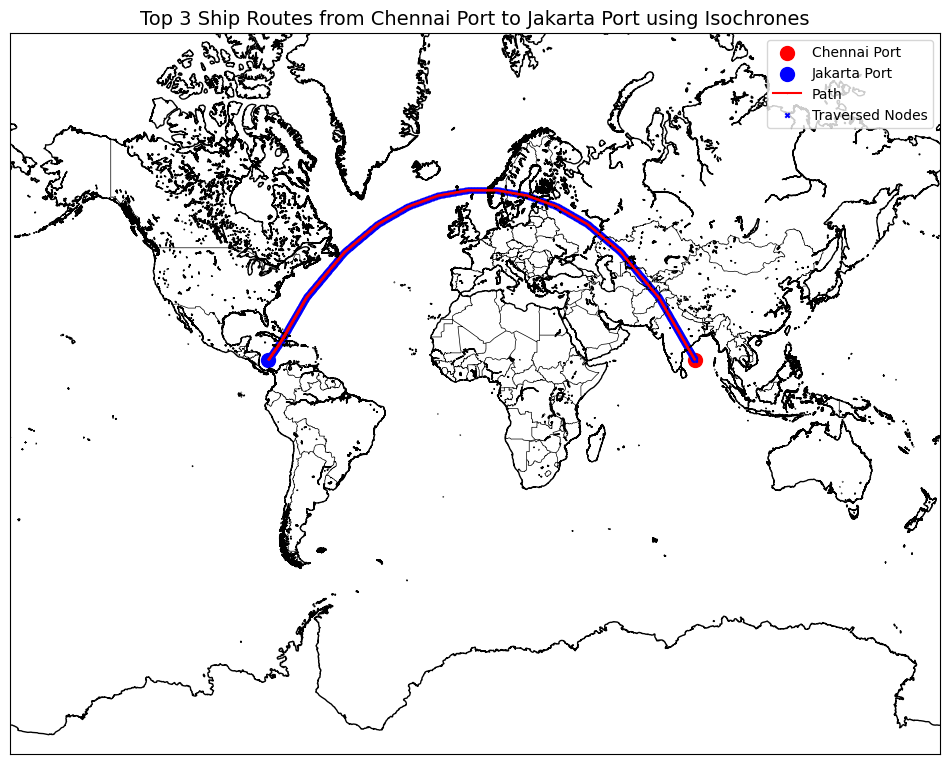

In [52]:
# Define the start and end ports with their coordinates
START_PORT = {
    'name': 'Chennai Port',
    'lat': 13,
    'lon': 85
}

END_PORT = {
    'name': 'Jakarta Port',
    'lat': 13, 
    'lon': -80
}

# Plotting the routes on a map with the Indian subcontinent in the background
plt.figure(figsize=(12, 10))
plt.title(f"Top 3 Ship Routes from {START_PORT['name']} to {END_PORT['name']} using Isochrones", fontsize=14)
# Draw coastlines and country boundaries
m.drawcoastlines()
m.drawcountries()

# Plot the start and end ports
x_start, y_start = m(START_PORT['lon'], START_PORT['lat'])
x_end, y_end = m(END_PORT['lon'], END_PORT['lat'])

# Plot markers for the start and end ports
m.scatter(x_start, y_start, color='red', marker='o', s=100, label=START_PORT['name'])
m.scatter(x_end, y_end, color='blue', marker='o', s=100, label=END_PORT['name'])

# Call the a_star function to get the path and traversed points
path,traversed = a_star(START_PORT['lat'], START_PORT['lon'], END_PORT['lat'], END_PORT['lon'], 0.05)
print(len(path),len(traversed))
print('haversine ',haversine(START_PORT['lat'], START_PORT['lon'], END_PORT['lat'], END_PORT['lon']))
# Extract latitudes and longitudes from the path and traversed points
path_latitudes, path_longitudes = zip(*path) if path else ([], [])
# latitudes, longitudes = zip(*path) if path else ([], [])
traversed_latitudes, traversed_longitudes = zip(*traversed) if traversed else ([], [])

# Convert coordinates to map projection
path_x, path_y = m(path_longitudes, path_latitudes)
# tpath_x, tpath_y = m(longitudes, latitudes)
traversed_x, traversed_y = m(traversed_longitudes, traversed_latitudes)

# Plot the path and traversed points
m.plot(path_x, path_y, color='red', linestyle='-', marker='o', markersize=0.1, label='Path')
# m.scatter\(tpath_x, tpath_y, color='orange', linestyle='-', marker='o', markersize=1, label='traversed')
m.scatter(traversed_x, traversed_y, color='blue', marker='x', s=10, label='Traversed Nodes')

# Add legend
plt.legend()
# Show the plot
plt.show()
# 13.025 84.95555972853214

In [57]:
np.cos(np.radians(180))

-1.0

In [113]:
import numpy as np

# Constants
AIR_DENSITY = 1.225  # kg/m^3
WATER_DENSITY = 1025  # kg/m^3
GRAVITY = 9.81  # m/s^2

# Example usage with real data
ship_speed = 20 * 1000 / 3600  # converting km/h to m/s
wind_speed = 40  # m/s
wind_direction = 180  # degrees
ship_heading = 0  # degrees
frontal_area = 32.2 * 10.8  # m^2
drag_coefficient = 0.4
wave_height = 4  # meters
wave_period = 10  # seconds
wave_direction = 180  # degrees
swell_height = 3  # meters
swell_period = 12  # seconds
swell_direction = 180  # degrees
bathymetry = 50  # meters depth
deviation_from_route = 2  # kilometers
ship_length = 230  # meters
displacement = 52030  # cubic meters

def calculate_relative_wind_speed(ship_speed, wind_speed, wind_direction, ship_heading):
    relative_angle = np.abs(wind_direction - ship_heading)
#     print(relative_angle)
    V_rel = np.sqrt(ship_speed**2 + wind_speed**2 + 2 * ship_speed * wind_speed * np.cos(relative_angle))
    return V_rel

def calculate_air_resistance(V_rel, frontal_area, drag_coefficient):
    air_resistance = 0.5 * AIR_DENSITY * drag_coefficient * frontal_area * (V_rel ** 2)
    return air_resistance

def calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading, ship_length, displacement):
    relative_angle = np.radians(np.abs(wave_direction - ship_heading))
    wave_resistance_coefficient = 0.1  # Adjust based on empirical data
    wave_resistance = wave_resistance_coefficient * wave_height * (ship_length / wave_period) * displacement * np.cos(relative_angle)
    return wave_resistance

def calculate_swell_resistance(swell_height, swell_period, swell_direction, ship_heading, ship_length, displacement):
    relative_angle = np.radians(np.abs(swell_direction - ship_heading))
    swell_resistance_coefficient = 0.1  # Similar to wave resistance
    swell_resistance = swell_resistance_coefficient * swell_height * (ship_length / swell_period) * displacement * np.cos(relative_angle)
    return swell_resistance

def calculate_involuntary_speed_reduction(wind_resistance, wave_resistance, swell_resistance):
    alpha=0.6
    beta=0.3
    gamma=0.1
    # Scale resistances down
    wind_resistance_scaled = wind_resistance / 1000
    wave_resistance_scaled = wave_resistance / 1000
    swell_resistance_scaled = swell_resistance / 1000

    # Calculate reductions
    V_wind_reduction = wind_resistance_scaled / ship_speed
    V_wave_reduction = wave_resistance_scaled / ship_speed
    V_swell_reduction = swell_resistance_scaled / ship_speed
    print(V_wind_reduction,V_wave_reduction,V_swell_reduction)
    delta_V = alpha * V_wind_reduction + beta * V_wave_reduction + gamma * V_swell_reduction
    return delta_V


def calculate_safety_cost(wind_resistance, wave_resistance, swell_resistance):
    alpha=0.6
    beta=0.3
    gamma=0.1
    delta = 0.1
    # Safety cost components
    C_wind = wind_resistance / 1000
    C_wave = wave_resistance / 1000
    C_swell = swell_resistance / 1000
    C_bathymetry = max(0, 1 - bathymetry / 10)
    C_deviation = deviation_from_route ** 2

    # Total safety cost
    total_cost = alpha * C_wind + beta * C_wave + gamma * C_swell + delta * C_bathymetry + (1 - (alpha + beta + gamma + delta)) * C_deviation
    return total_cost

# Calculate involuntary speed reduction
V_rel = calculate_relative_wind_speed(ship_speed, wind_speed, wind_direction, ship_heading)
print(V_rel)
wind_resistance = calculate_air_resistance(V_rel, frontal_area, drag_coefficient)
# print(wind_resistance)
wave_resistance = calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading, ship_length, displacement)
swell_resistance = calculate_swell_resistance(swell_height, swell_period, swell_direction, ship_heading, ship_length, displacement)

print(wind_resistance,wave_resistance,swell_resistance)
# involuntary_speed_reduction = calculate_involuntary_speed_reduction(wind_resistance, wave_resistance, swell_resistance)

# # Calculate safety cost
# safety_cost = calculate_safety_cost(wind_resistance, wave_resistance, swell_resistance)
# print(f"Involuntary Speed Reduction: {involuntary_speed_reduction:.2f} m/s")
# print(f"Safety Cost: {safety_cost:.2f}")
# 55643.74666666667 478676.00000000006 299172.50000000006 --> 0 0 20
# 17776.54666666667 -478676.00000000006 -299172.50000000006 --> 0 180 20
# 101084.38666666667 -478676.00000000006 -299172.50000000006 --> 0 180 40

36.94430869046355
116289.57953963896 -478676.00000000006 -299172.50000000006


In [114]:
import math

# Constants
AIR_DENSITY = 1.225  # kg/m^3
WATER_DENSITY = 1025  # kg/m^3
GRAVITY = 9.81  # m/s^2

# Ship Specifications
ship_speed = 20 * 1000 / 3600  # converting km/h to m/s
wind_speed = 10 # m/s
wind_direction = 180  # degrees
ship_heading = 0  # degrees
frontal_area = 32.2 * 10.8  # m^2
drag_coefficient = 0.4
wave_height = 4  # meters
wave_period = 10  # seconds
wave_direction = 180  # degrees
swell_height = 3  # meters
swell_period = 12  # seconds
swell_direction = 180  # degrees
bathymetry = 50  # meters depth
deviation_from_route = 2  # kilometers
ship_length = 230  # meters
displacement = 52030  # cubic meters

# 1. Wind Resistance (RAA)
def calculate_wind_resistance(air_density, drag_coefficient, frontal_area, ship_speed, wind_speed, wind_direction, ship_heading):
    # Convert angles to radians
    wind_direction_rad = math.radians(wind_direction)
    ship_heading_rad = math.radians(ship_heading)

    # Calculate relative wind speed
    relative_wind_speed = math.sqrt(
        wind_speed**2 + ship_speed**2 - 2 * wind_speed * ship_speed * math.cos(wind_direction_rad - ship_heading_rad)
    )
    
    # Calculate wind resistance
    RAA = 0.5 * air_density * drag_coefficient * frontal_area * relative_wind_speed**2
    return RAA

# 2. Wave Resistance (RAW)
def calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading, wave_coefficient=0.8):
    # Convert angles to radians
    wave_direction_rad = math.radians(wave_direction)
    ship_heading_rad = math.radians(ship_heading)
    
    # Calculate wave resistance
    RAW = wave_coefficient * wave_height**2 * wave_period * math.cos(wave_direction_rad - ship_heading_rad)
    return RAW

# 3. Steering Resistance (Rdd)
def calculate_steering_resistance(deviation_from_route, rudder_coefficient=0.05):
    Rdd = rudder_coefficient * deviation_from_route
    return Rdd

# 4. Drifting Resistance (Rbb)
def calculate_drift_resistance(displacement, drift_angle, drift_coefficient=0.1):
    # Convert drift angle to radians
    drift_angle_rad = math.radians(drift_angle)
    Rbb = drift_coefficient * displacement * math.sin(drift_angle_rad)
    return Rbb

# 5. Resistance Due to Water Temperature and Salinity (RAS)
def calculate_temp_salt_resistance(water_density, standard_density=1025, temp_salt_coefficient=0.02):
    delta_density = standard_density - water_density
    RAS = temp_salt_coefficient * delta_density
    return RAS

# 6. Displacement Deviation Resistance (RADIS)
def calculate_displacement_resistance(displacement, displacement_deviation, displacement_coefficient=0.03):
    RADIS = displacement_coefficient * displacement_deviation
    return RADIS

# 7. Total Resistance (DR)
def calculate_total_resistance(RAA, RAW, Rdd, Rbb, RAS, RADIS):
    DR = RAA + RAW + Rdd + Rbb + RAS + RADIS
    return DR

# Example usage of all functions

# Wind Resistance
RAA = calculate_wind_resistance(AIR_DENSITY, drag_coefficient, frontal_area, ship_speed, wind_speed, wind_direction, ship_heading)
print(f"Wind Resistance (RAA): {RAA:.2f} N")

# Wave Resistance
RAW = calculate_wave_resistance(wave_height, wave_period, wave_direction, ship_heading)
print(f"Wave Resistance (RAW): {RAW:.2f} N")

# Steering Resistance
Rdd = calculate_steering_resistance(deviation_from_route)
print(f"Steering Resistance (Rdd): {Rdd:.2f} N")

# Drifting Resistance
Rbb = calculate_drift_resistance(displacement, 5)  # assuming a drift angle of 5 degrees
print(f"Drifting Resistance (Rbb): {Rbb:.2f} N")

# Temperature and Salinity Resistance
RAS = calculate_temp_salt_resistance(WATER_DENSITY)
print(f"Temperature and Salinity Resistance (RAS): {RAS:.2f} N")

# Displacement Resistance
RADIS = calculate_displacement_resistance(displacement, 1000)  # assuming a displacement deviation of 1000 cubic meters
print(f"Displacement Resistance (RADIS): {RADIS:.2f} N")

# Total Resistance
total_resistance = calculate_total_resistance(RAA, RAW, Rdd, Rbb, RAS, RADIS)
print(f"Total Resistance (DR): {total_resistance:.2f} N")


Wind Resistance (RAA): 20616.59 N
Wave Resistance (RAW): -128.00 N
Steering Resistance (Rdd): 0.10 N
Drifting Resistance (Rbb): 453.47 N
Temperature and Salinity Resistance (RAS): 0.00 N
Displacement Resistance (RADIS): 30.00 N
Total Resistance (DR): 20972.16 N


In [23]:
import numpy as np
# Constants
AIR_DENSITY = 1.225  # kg/m^3
WATER_DENSITY = 1025  # kg/m^3
GRAVITY = 9.81  # m/s^2

# Ship Specifications
ship_speed = 10  # converting km/h to m/s
wind_speed = 6  # m/s
wind_direction = 0  # degrees
frontal_area = 32.2 * 10.8  # m^2
drag_coefficient = 0.4

ship_length = 230  # meters
displacement = 52030  # cubic meters
block_coefficient = 0.651

# 1. Wind Resistance (RAA)
# def calculate_wind_resistance(wind_speed, wind_direction, ship_heading):
#     wind_direction_rad = math.radians(wind_direction)
#     ship_heading_rad = math.radians(ship_heading)
#     relative_wind_speed = math.sqrt(
#         wind_speed**2 + ship_speed**2 - 2 * wind_speed * ship_speed * math.cos(wind_direction_rad - ship_heading_rad)
#     )
#     RAA = 0.5 * air_density * drag_coefficient * frontal_area * relative_wind_speed**2
#     return RAA
ship_heading = 0  # degrees
wave_height = 3  # meters
wave_period = 10  # seconds
wave_direction = 90  # degrees
swell_height = 3  # meters
swell_period = 12  # seconds
swell_direction = 0  # degrees

# 2. Wave Resistance (RAW)
def calculate_wave_resistance(wave_height, wave_period, wave_direction):
    speed =  5 * wave_height**2 /wave_period
    dir = -1*(100/speed) * np.cos(np.radians(ship_heading - wave_direction))
    return speed,dir    

# 2. Swell Resistance (RAW)
def calculate_swell_resistance(wave_height, wave_period, wave_direction):
    speed = wave_height**2 /wave_period
    dir = -1*(1000/speed) * np.cos(np.radians(ship_heading - wave_direction))
    return speed,dir

print(calculate_wave_resistance(wave_height,wave_period,wave_direction))
# 3. Steering Resistance (Rdd)



(4.5, -1.3607186657192812e-15)


In [49]:
import math

def calculate_bearing(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Calculate the change in longitude
    d_lon = lon2 - lon1

    # Calculate the bearing using the formula
    x = math.sin(d_lon) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1) * math.cos(lat2) * math.cos(d_lon))
    initial_bearing = math.atan2(x, y)

    # Convert the bearing from radians to degrees
    initial_bearing = math.degrees(initial_bearing)

    # Normalize the bearing to a compass bearing (0 to 360 degrees)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing

# Example usage
lat1, lon1 =12.0,80.0  # Chennai, India
lat2, lon2 = 17.0, 80.0 # Jakarta, Indonesia
angle1 = np.radians(calculate_bearing(lat1, lon1, lat2, lon2))
angle2 = np.radians(270)
print(np.cos(abs(angle1 - angle2)))
print(f"Bearing from point 1 to point 2: {angle1:.2f}°")

-1.8369701987210297e-16
Bearing from point 1 to point 2: 0.00°
